In [3]:
# Loadind data 

In [1]:
from module.LoadData import load_data, decide_entity_label

In [2]:
ld = load_data()

In [3]:
#df_train = ld.Load_Data("conll2012_ontonotesv5","train")
df_train = ld.Load_Data("conll2012_ontonotesv5","test")
#df_valid = ld.Load_Data("conll2012_ontonotesv5","validation")

Reusing dataset conll2012_ontonotesv5 (C:\Users\User\.cache\huggingface\datasets\conll2012_ontonotesv5\chinese_v4\1.0.0\c541e760a5983b07e403e77ccf1f10864a6ae3e3dc0b994112eff9f217198c65)


In [4]:
del_ = decide_entity_label('EVENT')
df_train = del_.Decide_Entity_Label(df_train)

In [5]:
df_train.head()

,tags_encoding,words
0,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[各, 位, 好, ,, 歡, 迎, 您, 收, 看, 國, 際, 頻, 道, 的, 今, ..."
1,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[流, 感, ,, 我, 想, 這, 呢, 應, 該, 是, 非, 常, 正, 確, 的, ..."
2,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[出, 的, 一, 本, 名, 為, 《, 神, 祕, 男, 人, 》, 的, 新, 書, ..."
3,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[這, 其, 中, 有, 沒, 有, 任, 何, 犯, 罪, ., 嗯, ,, 特, 別, ..."
4,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[作, 並, 且, 推, 薦, 了, 他, ,, 他, 才, 得, 到, 他, 的, 這, ..."


In [6]:
from module.Modeler import modeler

Using TensorFlow backend.
C:\Users\User\Anaconda3\envs\torch_3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\envs\torch_3\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\envs\torch_3\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\Anaconda3\envs\torch_3\lib\sit

In [7]:
Modeler = modeler("../ckip-base-chinese-ner","EVENT")

In [8]:
train_dataloader , valid_dataloader = Modeler.preprocess(df_train)

C:\Users\User\Tim\kaggle\公司NER\timk_bert_ner\module\Modeler.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_inputs = torch.tensor(tr_inputs).to(torch.int64)
C:\Users\User\Tim\kaggle\公司NER\timk_bert_ner\module\Modeler.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_inputs = torch.tensor(val_inputs).to(torch.int64)
C:\Users\User\Tim\kaggle\公司NER\timk_bert_ner\module\Modeler.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tr_tags=torch.tensor(tr_tags, dtype=torch.long)
C:\Users\User\Tim\kaggle\公司NER\timk_bert_ner\module

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\User\Anaconda3\envs\torch_3\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: PAD seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
Epoch:  33%|███▎      | 1/3 [00:00<00:01,  1.04it/s]

Average train loss: 1.837084134419759
Validation loss: 1.39500892162323
Validation Accuracy: 0.192
Validation F1-Score: 0.0
****************************************************************************************************


Epoch:  67%|██████▋   | 2/3 [00:01<00:00,  1.24it/s]

Average train loss: 1.1727029879887898
Validation loss: 1.0102250576019287
Validation Accuracy: 0.8493333333333334
Validation F1-Score: 0.0
****************************************************************************************************


Epoch: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

Average train loss: 0.8352597951889038
Validation loss: 0.8736280202865601
Validation Accuracy: 0.8533333333333334
Validation F1-Score: 0.0
****************************************************************************************************


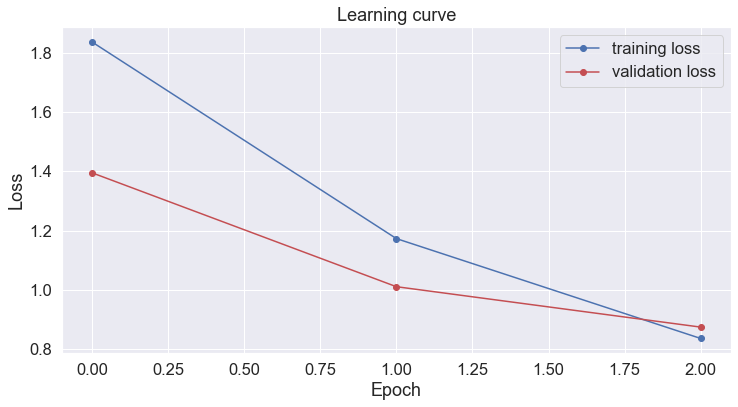

In [9]:
ner_model = Modeler.train("../ckip-base-chinese-ner",train_dataloader , valid_dataloader,save_model_path = 'model/')

In [11]:
txt = '''什麼樣的記憶?敬請收看走遍中國特別節目,中國大地上的二戰標志之太行永志。EMPTY百團大戰紀念碑巍然屹立在太行山上,它由主碑,副碑,一座大型圓雕和烽火臺'''
output = Modeler.predict_for_one(txt,'model/')
output

'[CLS]什麼樣的記憶?敬請收看走遍中國特別節目,中國大地上的二戰標志之太行永志。[UNK]百團大戰(E-EVENT)紀念碑巍然屹立在太行(I-EVENT)山上,它由主碑,副碑,一座大型圓雕和烽火臺[SEP]'